In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


In [220]:
df = pd.read_csv("https://raw.githubusercontent.com/pankaj1551/Thyroid-Prediction-System/main/thyroid_data.csv")

In [221]:
df.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [222]:
df

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,Query Hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH Measured,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2774,82,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.2,t,1,t,68,t,0.77,t,88,sick
3217,2776,79,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.1,t,0.7,t,116,t,0.85,t,137,sick
3218,2782,50,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,4.8,t,0.6,t,98,t,0.8,t,122,sick
3219,2786,73,?,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.015,t,1.8,t,173,t,1,t,173,sick


In [223]:
df.shape

(3221, 28)

In [224]:
df['Category'].value_counts().index.to_list()

['negative', 'hypothyroid', 'sick', 'hyperthyroid']

In [225]:
df['Category'].value_counts().to_list()

[2753, 220, 171, 77]

In [226]:
df['Category'].value_counts().index.to_list()

['negative', 'hypothyroid', 'sick', 'hyperthyroid']

In [227]:
## Let's drop some unnecessary columns
df=df.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured', 
       'FTI Measured'],axis=1)

In [228]:
df

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
0,41,F,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,4.1,2,102,?,?,negative
2,46,M,f,f,f,f,f,0.98,?,109,0.91,120,negative
3,70,F,f,f,f,f,f,0.16,1.9,175,?,?,negative
4,70,F,f,f,f,f,f,0.72,1.2,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82,M,f,f,f,f,f,2.2,1,68,0.77,88,sick
3217,79,M,f,f,f,f,f,1.1,0.7,116,0.85,137,sick
3218,50,F,f,f,f,f,f,4.8,0.6,98,0.8,122,sick
3219,73,?,f,f,f,f,f,0.015,1.8,173,1,173,sick


In [229]:
df.shape

(3221, 13)

In [230]:
df.size

41873

In [231]:
df.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [232]:
df.describe()

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
count,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221
unique,94,3,2,2,2,2,2,264,65,218,139,210,4
top,59,F,f,f,f,f,f,?,?,?,?,?,negative
freq,91,2108,3080,3175,3180,3194,3130,247,589,142,276,274,2753


In [233]:
df.isnull().sum()

Age                0
Sex                0
Sick               0
Pregnant           0
Thyroid Surgery    0
Goitre             0
Tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Category           0
dtype: int64

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              3221 non-null   object
 1   Sex              3221 non-null   object
 2   Sick             3221 non-null   object
 3   Pregnant         3221 non-null   object
 4   Thyroid Surgery  3221 non-null   object
 5   Goitre           3221 non-null   object
 6   Tumor            3221 non-null   object
 7   TSH              3221 non-null   object
 8   T3               3221 non-null   object
 9   TT4              3221 non-null   object
 10  T4U              3221 non-null   object
 11  FTI              3221 non-null   object
 12  Category         3221 non-null   object
dtypes: object(13)
memory usage: 327.3+ KB


In [235]:
for i in df.columns:
    print('-'*50)
    print(i)
    print(df[i].unique())

--------------------------------------------------
Age
['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
--------------------------------------------------
Sex
['F' 'M' '?']
--------------------------------------------------
Sick
['f' 't']
--------------------------------------------------
Pregnant
['f' 't']
--------------------------------------------------
Thyroid Surgery
['f' 't']
--------------------------------------------------
Goitre
['f' 't']
--------------------------------------------------
Tumor
['f' 't']
--------------------------------------------------
TSH
['

In [236]:
df['Age'].unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25',
       '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61',
       '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76',
       '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57',
       '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '?', '93', '92'], dtype=object)

In [237]:
# replace the ? with nan
df.replace('?',np.nan, inplace=True)

In [238]:
for i in df.columns:
    print('-'*50)
    print(i)
    print(df[i].unique())

--------------------------------------------------
Age
['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
--------------------------------------------------
Sex
['F' 'M' nan]
--------------------------------------------------
Sick
['f' 't']
--------------------------------------------------
Pregnant
['f' 't']
--------------------------------------------------
Thyroid Surgery
['f' 't']
--------------------------------------------------
Goitre
['f' 't']
--------------------------------------------------
Tumor
['f' 't']
--------------------------------------------------
TSH
['

In [239]:
df.isnull().sum()

Age                  1
Sex                127
Sick                 0
Pregnant             0
Thyroid Surgery      0
Goitre               0
Tumor                0
TSH                247
T3                 589
TT4                142
T4U                276
FTI                274
Category             0
dtype: int64

In [240]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [241]:
df['Sex'] = df['Sex'].fillna(df['Sex'].mode())

In [242]:
df['TSH'] = df['TSH'].fillna(df['TSH'].median())

In [243]:
df['Age'] = df['Age'].astype(int)

In [244]:
df

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
0,41,F,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,4.1,2,102,NaN,NaN,negative
2,46,M,f,f,f,f,f,0.98,NaN,109,0.91,120,negative
3,70,F,f,f,f,f,f,0.16,1.9,175,NaN,NaN,negative
4,70,F,f,f,f,f,f,0.72,1.2,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82,M,f,f,f,f,f,2.2,1,68,0.77,88,sick
3217,79,M,f,f,f,f,f,1.1,0.7,116,0.85,137,sick
3218,50,F,f,f,f,f,f,4.8,0.6,98,0.8,122,sick
3219,73,NaN,f,f,f,f,f,0.015,1.8,173,1,173,sick


In [245]:
df.dtypes

Age                 int32
Sex                object
Sick               object
Pregnant           object
Thyroid Surgery    object
Goitre             object
Tumor              object
TSH                object
T3                 object
TT4                object
T4U                object
FTI                object
Category           object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

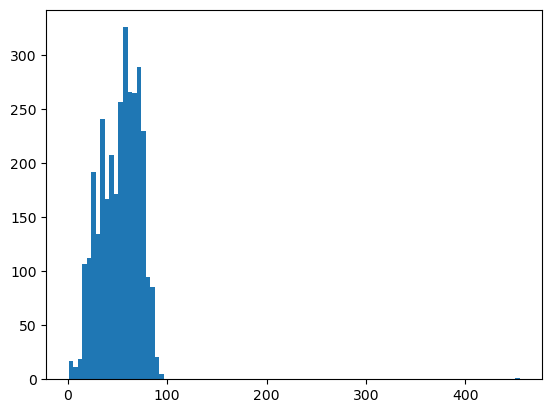

In [246]:
plt.hist(df['Age'],bins=100)
plt.show

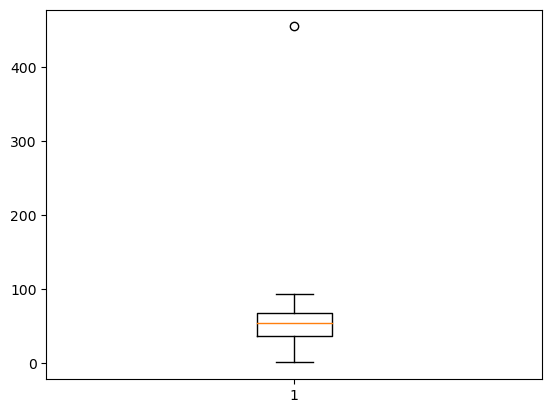

In [247]:
plt.boxplot(df['Age'])
plt.show()

In [248]:
# there is an outlier in age need to remove

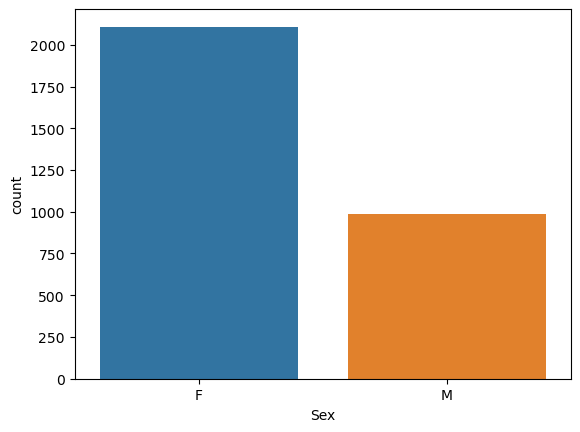

In [249]:
sns.countplot(x='Sex',data = df)
plt.show()

In [250]:
#count of feamle is alomst doublr of male

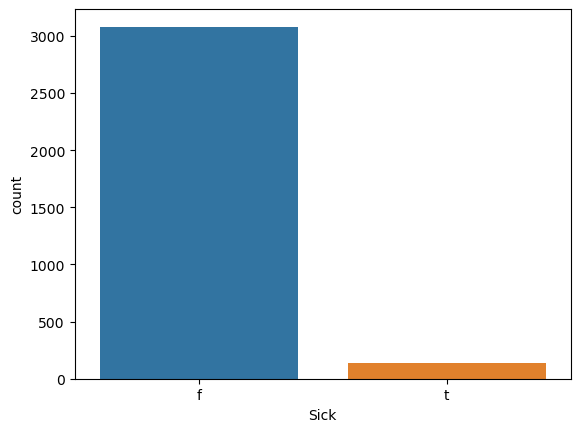

In [251]:
sns.countplot(x='Sick',data = df)
plt.show()

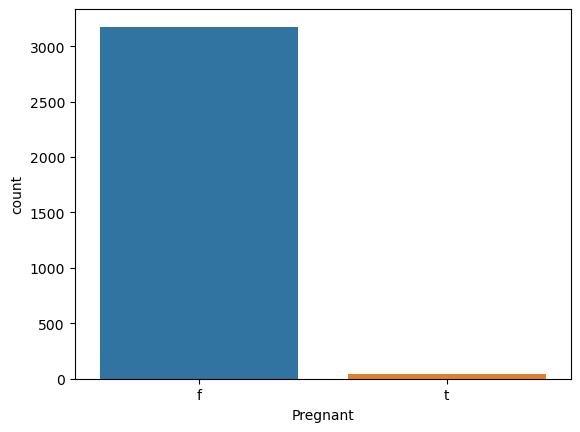

In [252]:
sns.countplot(x='Pregnant',data = df)
plt.show()

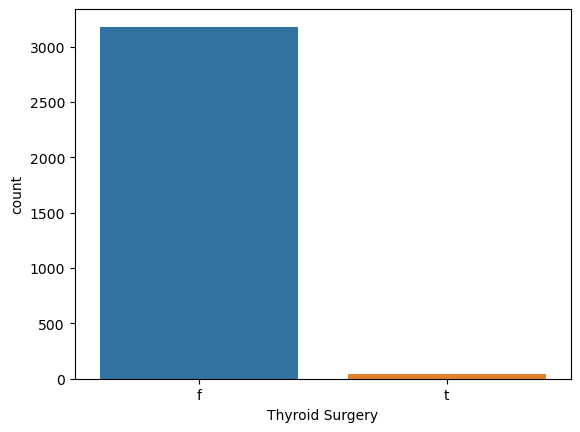

In [253]:
sns.countplot(x='Thyroid Surgery',data = df)
plt.show()

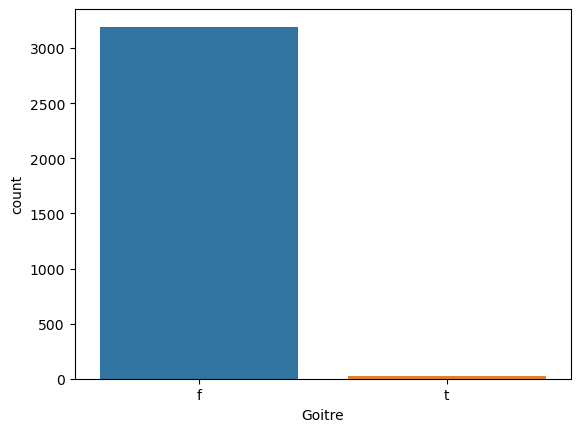

In [254]:
sns.countplot(x='Goitre',data = df)
plt.show()

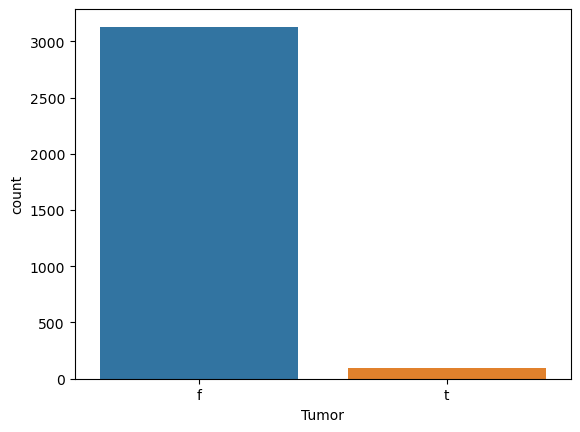

In [255]:
sns.countplot(x='Tumor',data = df)
plt.show()

In [256]:
df['TSH'].isnull().sum()

0

In [257]:
df['TSH'] = df['TSH'].astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

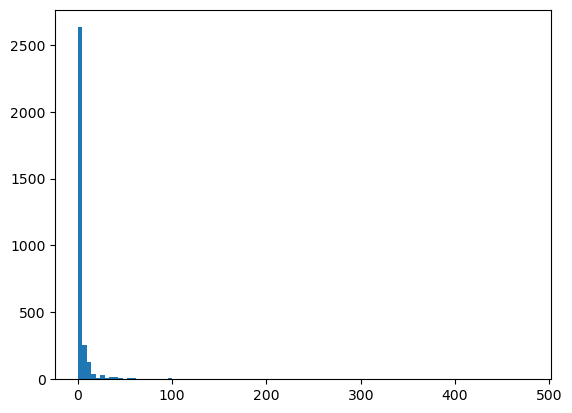

In [258]:
plt.hist(df['TSH'],bins=100)
plt.show

In [259]:
#tsh is high right skewd so we can drop

In [260]:
df['T3'] = df['T3'].fillna(df['T3'].median())

In [261]:
df['T3'] = df['T3'].astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

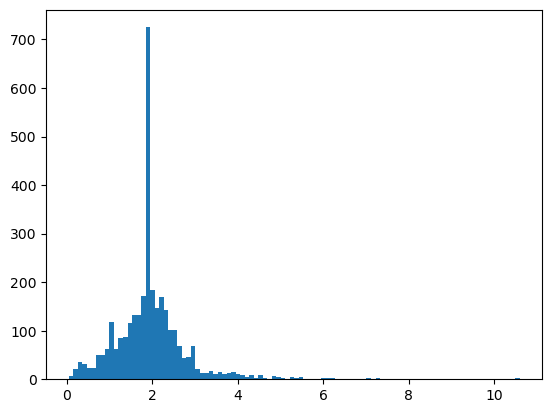

In [262]:
plt.hist(df['T3'],bins=100)
plt.show

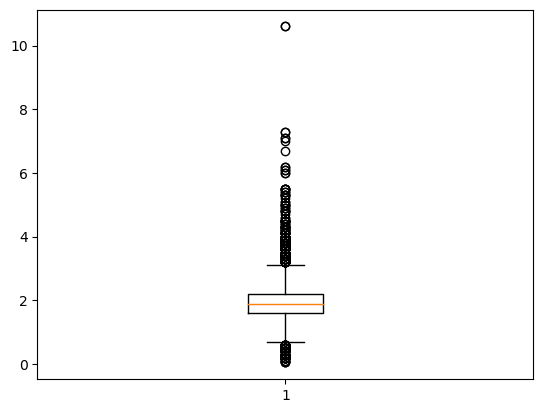

In [263]:
plt.boxplot(df['T3'])
plt.show()

In [264]:
df['TT4'] = df['TT4'].fillna(df['TT4'].median())

In [265]:
df['TT4'] = df['TT4'].astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

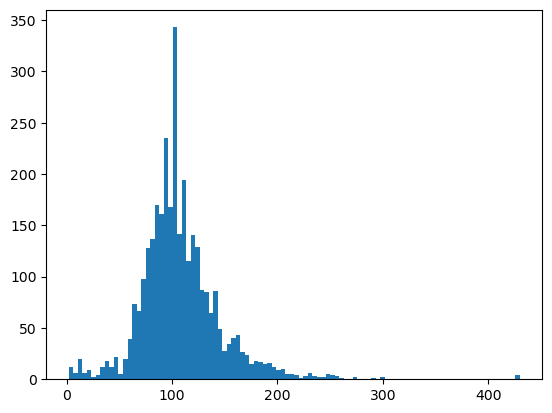

In [266]:
plt.hist(df['TT4'],bins=100)
plt.show

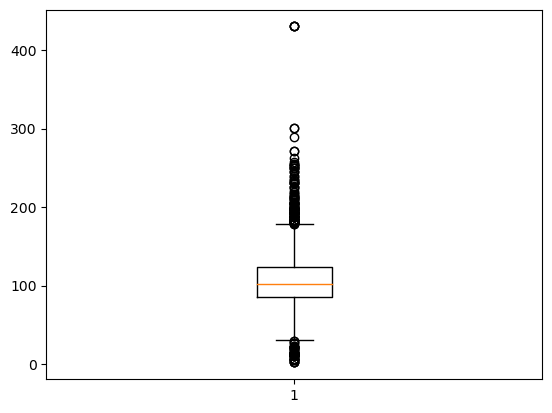

In [267]:
plt.boxplot(df['TT4'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

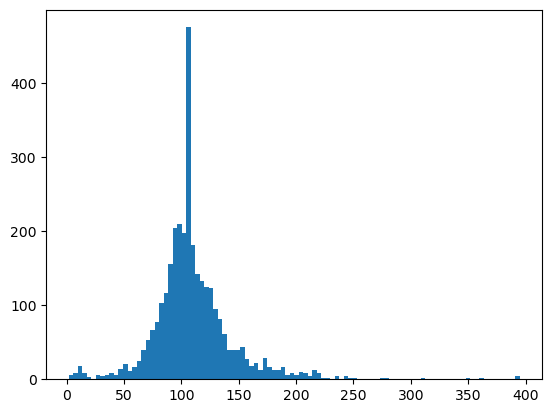

In [268]:
#FTI
df['FTI'] = df['FTI'].fillna(df['FTI'].median())
df['FTI'] = df['FTI'].astype(float)
plt.hist(df['FTI'],bins=100)
plt.show

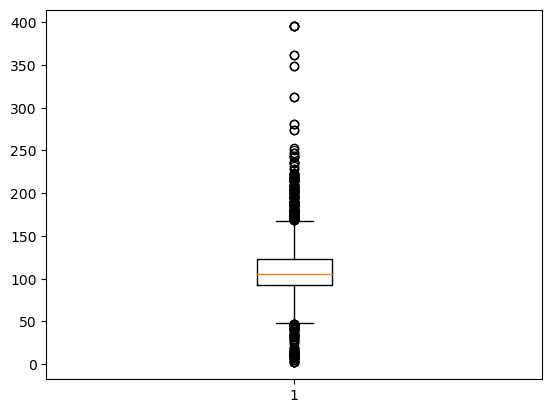

In [269]:
plt.boxplot(df['FTI'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

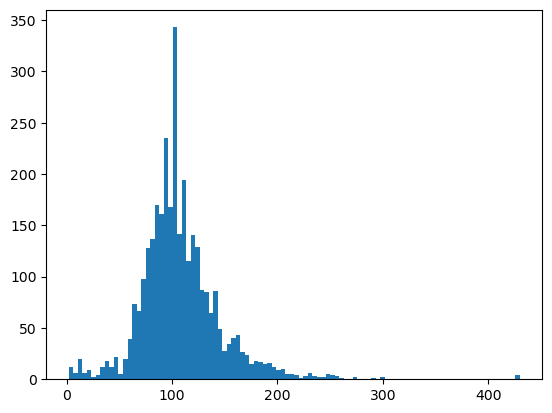

In [270]:
#FTI
df['TT4'] = df['TT4'].fillna(df['TT4'].median())
df['TT4'] = df['TT4'].astype(float)
plt.hist(df['TT4'],bins=100)
plt.show

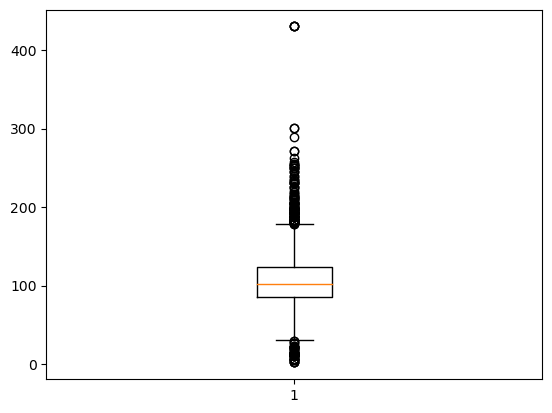

In [271]:
plt.boxplot(df['TT4'])
plt.show()

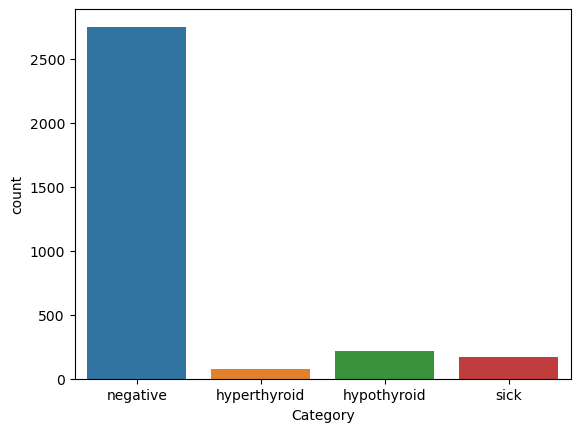

In [272]:
sns.countplot(x='Category',data = df)
plt.show()

In [273]:
df

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,TSH,T3,TT4,T4U,FTI,Category
0,41,F,f,f,f,f,f,1.300,2.5,125.0,1.14,109.0,negative
1,23,F,f,f,f,f,f,4.100,2.0,102.0,NaN,106.0,negative
2,46,M,f,f,f,f,f,0.980,1.9,109.0,0.91,120.0,negative
3,70,F,f,f,f,f,f,0.160,1.9,175.0,NaN,106.0,negative
4,70,F,f,f,f,f,f,0.720,1.2,61.0,0.87,70.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82,M,f,f,f,f,f,2.200,1.0,68.0,0.77,88.0,sick
3217,79,M,f,f,f,f,f,1.100,0.7,116.0,0.85,137.0,sick
3218,50,F,f,f,f,f,f,4.800,0.6,98.0,0.8,122.0,sick
3219,73,NaN,f,f,f,f,f,0.015,1.8,173.0,1,173.0,sick


In [274]:
df.dtypes

Age                  int32
Sex                 object
Sick                object
Pregnant            object
Thyroid Surgery     object
Goitre              object
Tumor               object
TSH                float64
T3                 float64
TT4                float64
T4U                 object
FTI                float64
Category            object
dtype: object

<Axes: >

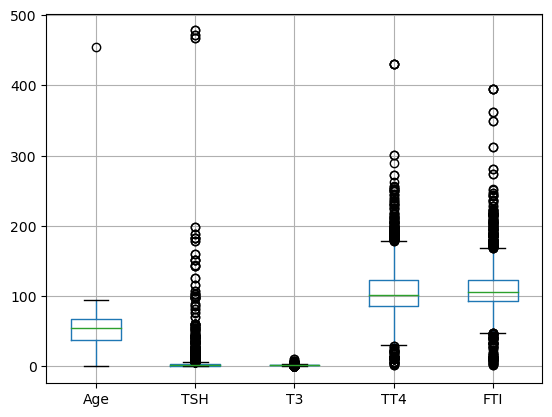

In [275]:
df.boxplot()

In [276]:
#sns.pairplot(df)

<Axes: >

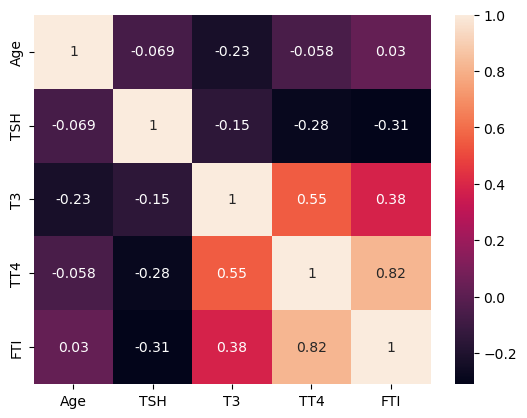

In [277]:
sns.heatmap(df.corr(),annot=True)

In [278]:
df.isnull().sum()

Age                  0
Sex                127
Sick                 0
Pregnant             0
Thyroid Surgery      0
Goitre               0
Tumor                0
TSH                  0
T3                   0
TT4                  0
T4U                276
FTI                  0
Category             0
dtype: int64

In [279]:
df['Sex'] = df['Sex'].fillna('F')

In [280]:
df['Sex'].mode()

0    F
Name: Sex, dtype: object

In [281]:
df['T4U'].isnull().sum()

276

In [282]:
df['T4U'].mode()[0]

'0.99'

In [283]:
df['T4U'] = df['T4U'].fillna(df['T4U'].mode()[0])

In [284]:
df.isnull().sum()

Age                0
Sex                0
Sick               0
Pregnant           0
Thyroid Surgery    0
Goitre             0
Tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Category           0
dtype: int64

In [285]:
df.drop(columns = 'TSH',inplace=True)

In [286]:
df_test = df.copy()

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
ohe = OneHotEncoder()

In [70]:
df_encoded = pd.DataFrame(ohe.fit_transform(df[['Sex']]).toarray(),columns=ohe.get_feature_names_out()).reset_index(drop=True)
df_encoded

,Sex_F,Sex_M
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
3216,0.0,1.0
3217,0.0,1.0
3218,1.0,0.0
3219,1.0,0.0


In [71]:
pd.concat([df,df_encoded],axis=1)

,Age,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor,T3,TT4,T4U,FTI,Category,Sex_F,Sex_M
0,41,F,f,f,f,f,f,2.5,125.0,1.14,109.0,negative,1.0,0.0
1,23,F,f,f,f,f,f,2.0,102.0,0.99,106.0,negative,1.0,0.0
2,46,M,f,f,f,f,f,1.9,109.0,0.91,120.0,negative,0.0,1.0
3,70,F,f,f,f,f,f,1.9,175.0,0.99,106.0,negative,1.0,0.0
4,70,F,f,f,f,f,f,1.2,61.0,0.87,70.0,negative,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82,M,f,f,f,f,f,1.0,68.0,0.77,88.0,sick,0.0,1.0
3217,79,M,f,f,f,f,f,0.7,116.0,0.85,137.0,sick,0.0,1.0
3218,50,F,f,f,f,f,f,0.6,98.0,0.8,122.0,sick,1.0,0.0
3219,73,F,f,f,f,f,f,1.8,173.0,1,173.0,sick,1.0,0.0


In [291]:
def ohe_encoder(df,column):
    df_encoded = pd.DataFrame(ohe.fit_transform(df[[column]]).toarray(),columns=ohe.get_feature_names_out()).reset_index(drop=True)
    df=pd.concat([df,df_encoded],axis=1)
    df.drop(columns=column,inplace=True)
    return df

In [73]:
df=ohe_encoder(df,'Sex')
df=ohe_encoder(df,'Sick')
df=ohe_encoder(df,'Pregnant')
df=ohe_encoder(df,'Thyroid Surgery')
df=ohe_encoder(df,'Goitre')
df=ohe_encoder(df,'Tumor')

In [328]:
# Initialize the OneHotEncoder
all_encoder = OneHotEncoder()

# Fit and transform the encoder on the DataFrame
encoded_features = all_encoder.fit_transform(df_test[['Sex', 'Sick','Pregnant','Thyroid Surgery','Goitre','Tumor']]).toarray()

pd.DataFrame(encoded_features,columns=all_encoder.get_feature_names_out())

,Sex_F,Sex_M,Sick_f,Sick_t,Pregnant_f,Pregnant_t,Thyroid Surgery_f,Thyroid Surgery_t,Goitre_f,Goitre_t,Tumor_f,Tumor_t
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3216,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3217,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3218,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3219,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [74]:
df

,Age,T3,TT4,T4U,FTI,Category,Sex_F,Sex_M,Sick_f,Sick_t,Pregnant_f,Pregnant_t,Thyroid Surgery_f,Thyroid Surgery_t,Goitre_f,Goitre_t,Tumor_f,Tumor_t
0,41,2.5,125.0,1.14,109.0,negative,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,23,2.0,102.0,0.99,106.0,negative,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,46,1.9,109.0,0.91,120.0,negative,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,70,1.9,175.0,0.99,106.0,negative,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,70,1.2,61.0,0.87,70.0,negative,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82,1.0,68.0,0.77,88.0,sick,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3217,79,0.7,116.0,0.85,137.0,sick,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3218,50,0.6,98.0,0.8,122.0,sick,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3219,73,1.8,173.0,1,173.0,sick,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [75]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
df['Category']=lblEn.fit_transform(df['Category'])

In [76]:
df

,Age,T3,TT4,T4U,FTI,Category,Sex_F,Sex_M,Sick_f,Sick_t,Pregnant_f,Pregnant_t,Thyroid Surgery_f,Thyroid Surgery_t,Goitre_f,Goitre_t,Tumor_f,Tumor_t
0,41,2.5,125.0,1.14,109.0,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,23,2.0,102.0,0.99,106.0,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,46,1.9,109.0,0.91,120.0,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,70,1.9,175.0,0.99,106.0,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,70,1.2,61.0,0.87,70.0,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,82,1.0,68.0,0.77,88.0,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3217,79,0.7,116.0,0.85,137.0,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3218,50,0.6,98.0,0.8,122.0,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3219,73,1.8,173.0,1,173.0,3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [79]:
x = df.drop(columns='Category')
y = df['Category']

In [80]:
x.shape,y.shape

((3221, 17), (3221,))

In [81]:
# now the output category is imbalanced. Need to balce it
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE

In [82]:
# 42 input

from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_resample(X,y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)


In [85]:
X_sampled.shape

(11012, 17)

In [87]:
y_sampled.shape

(11012,)

In [91]:
pd.DataFrame(y_sampled).value_counts()

Category
0           2753
1           2753
2           2753
3           2753
dtype: int64

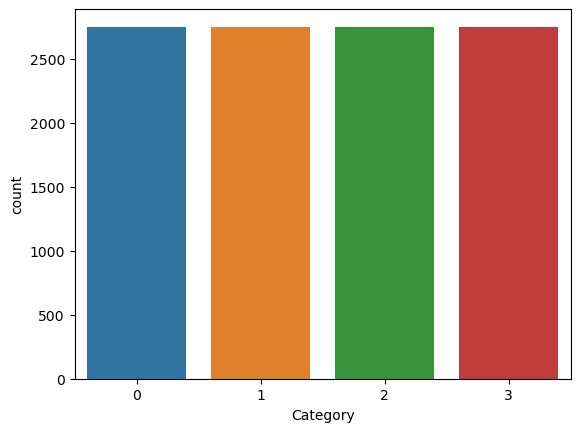

In [97]:
sns.countplot(x='Category',data = pd.DataFrame(y_sampled))
plt.show()

In [ ]:
#train test split

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.33, random_state=42)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7378, 17), (3634, 17), (7378,), (3634,))

In [ ]:
#Standardardization

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [106]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Applying models for classification

In [108]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression()
from sklearn.svm import SVC
svc_class = SVC()
from sklearn.tree import DecisionTreeClassifier
decition_class = DecisionTreeClassifier()


In [110]:
log_class.fit(X_train_scaled,y_train)
y_pred = log_class.predict(X_test_scaled)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[856   0  46  12]
 [  5 543 217 133]
 [ 96 193 540  95]
 [ 65 106  15 712]]
0.7294991744634012
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       914
           1       0.64      0.60      0.62       898
           2       0.66      0.58      0.62       924
           3       0.75      0.79      0.77       898

    accuracy                           0.73      3634
   macro avg       0.72      0.73      0.72      3634
weighted avg       0.72      0.73      0.72      3634



In [120]:
svc_class.fit(X_train_scaled,y_train)
y_pred = svc_class.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[914   0   0   0]
 [  5 556 187 150]
 [ 81 197 554  92]
 [ 83  54   0 761]]
0.7663731425426528
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       914
           1       0.69      0.62      0.65       898
           2       0.75      0.60      0.67       924
           3       0.76      0.85      0.80       898

    accuracy                           0.77      3634
   macro avg       0.76      0.77      0.76      3634
weighted avg       0.76      0.77      0.76      3634



In [121]:
decition_class.fit(X_train_scaled,y_train)
y_pred = decition_class.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[914   0   0   0]
 [  0 832   0  66]
 [ 42 147 687  48]
 [ 83  29   0 786]]
0.8858007705008255
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       914
           1       0.83      0.93      0.87       898
           2       1.00      0.74      0.85       924
           3       0.87      0.88      0.87       898

    accuracy                           0.89      3634
   macro avg       0.89      0.89      0.88      3634
weighted avg       0.90      0.89      0.88      3634



In [ ]:
# so we can see that the accuracy is good for the decition tree for our model

In [ ]:
# hyper parameter tuning for decusion tree

In [141]:
parameter = {
            'criterion' : ['gini','entropy','logloss'],
            'splitter' : ['best','random'],
            'max_depth' : [1,2,3,4,5],
            'max_features' : ['auto','sqrt','log2']
    
}

In [175]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=20,verbose=True,scoring='accuracy')

In [176]:
gscv.fit(X_train_scaled,y_train)

Fitting 20 folds for each of 90 candidates, totalling 1800 fits


GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'logloss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=True)

In [177]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [178]:
y_pred = gscv.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[851  34  29   0]
 [ 16 575 138 169]
 [ 88 421 242 173]
 [ 98 136  41 623]]
0.6304347826086957
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       914
           1       0.49      0.64      0.56       898
           2       0.54      0.26      0.35       924
           3       0.65      0.69      0.67       898

    accuracy                           0.63      3634
   macro avg       0.62      0.63      0.61      3634
weighted avg       0.62      0.63      0.61      3634



In [180]:
# trainng with the best parametres
decition_class = DecisionTreeClassifier(criterion= 'entropy',max_depth=5,max_features= 'sqrt',splitter='best')
decition_class.fit(X_train_scaled,y_train)
y_pred = decition_class.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[914   0   0   0]
 [ 21 419 229 229]
 [ 75 127 481 241]
 [ 83  63   0 752]]
0.7061089708310402
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       914
           1       0.69      0.47      0.56       898
           2       0.68      0.52      0.59       924
           3       0.62      0.84      0.71       898

    accuracy                           0.71      3634
   macro avg       0.70      0.71      0.69      3634
weighted avg       0.70      0.71      0.69      3634



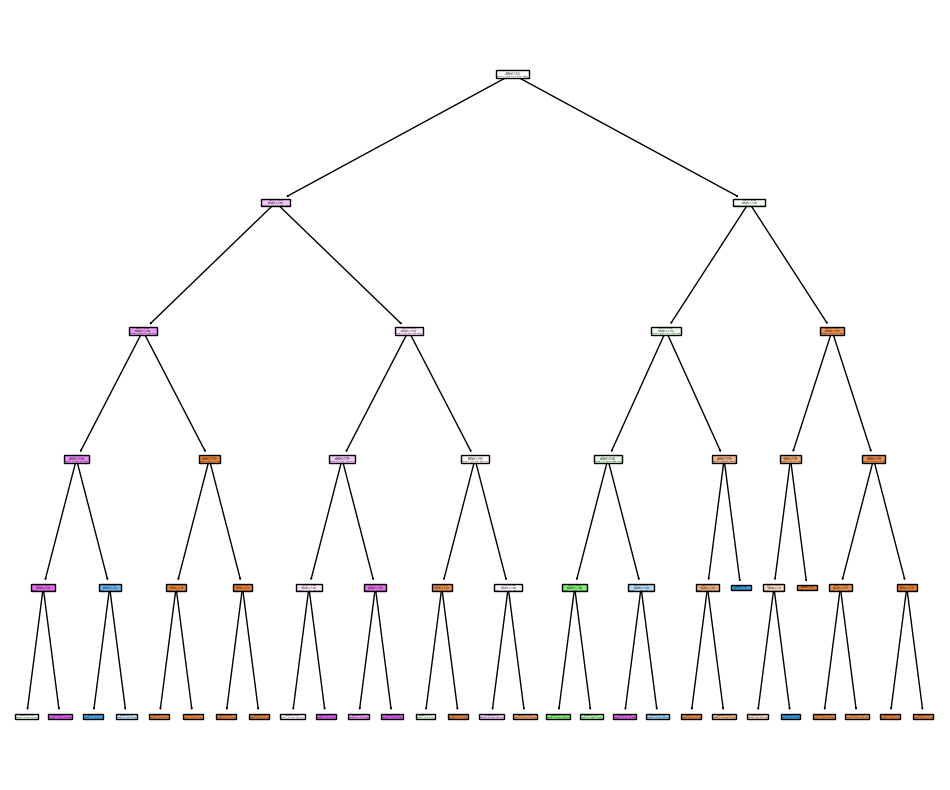

In [182]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(decition_class,filled=True)
plt.show()

In [ ]:
#post prunig

In [186]:
# trainng with the best parametres
decition_class = DecisionTreeClassifier(criterion= 'entropy',max_depth=5,max_features= 'sqrt',splitter='best')
decition_class.fit(X_train_scaled,y_train)
y_pred = decition_class.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[914   0   0   0]
 [ 15 172 639  72]
 [ 82  26 772  44]
 [ 83 174  29 612]]
0.6796917996697853
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       914
           1       0.46      0.19      0.27       898
           2       0.54      0.84      0.65       924
           3       0.84      0.68      0.75       898

    accuracy                           0.68      3634
   macro avg       0.67      0.68      0.65      3634
weighted avg       0.67      0.68      0.65      3634



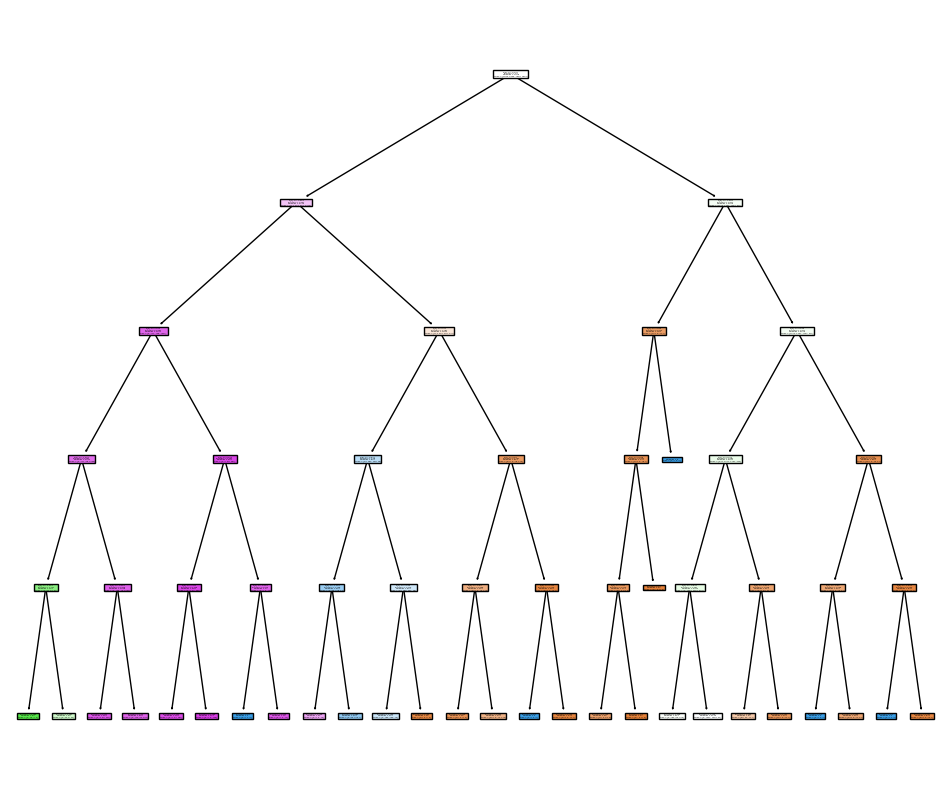

In [187]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(decition_class,filled=True)
plt.show()

In [193]:
# from sklearn.model_selection import cross_val_score

# scores  = cross_val_score(gscv,X_train,y_train,scoring='accuracy',cv=5)
# y_scores = gscv.predict_proba(X_test)[:, 1]
# from sklearn.metrics import roc_curve, roc_auc_score
# fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label='ROC Curve')
# plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()


In [ ]:
# we have found the best model. Lets train the model with whole data

In [195]:
X_train = scaler.transform(X_sampled)
# trainng with the best parametres
decition_class = DecisionTreeClassifier(criterion= 'entropy',max_depth=5,max_features= 'sqrt',splitter='best')
decition_class.fit(X_train,y_sampled)
y_pred = decition_class.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[914   0   0   0]
 [ 36 497 254 111]
 [143 351 375  55]
 [ 83 110  56 649]]
0.6700605393505779
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       914
           1       0.52      0.55      0.54       898
           2       0.55      0.41      0.47       924
           3       0.80      0.72      0.76       898

    accuracy                           0.67      3634
   macro avg       0.66      0.67      0.66      3634
weighted avg       0.66      0.67      0.66      3634



In [218]:
x_test_data = scaler.transform([x.iloc[2]])
y_pred = decition_class.predict(x_test_data)
lblEn.inverse_transform(y_pred)[0]

'negative'

In [393]:
df2 = df.iloc[0:1]
df2.drop(columns=['Category'],inplace=True)
out_features = all_encoder.transform(X=df2[['Sex', 'Sick','Pregnant','Thyroid Surgery','Goitre','Tumor']]).toarray()
out_features = pd.DataFrame(out_features,columns=all_encoder.get_feature_names_out())
df2 = df2.drop(columns=['Sex', 'Sick','Pregnant','Thyroid Surgery','Goitre','Tumor'])
out_features = pd.concat([df2,out_features],axis=1)
np.array(out_features)
x_test_data = scaler.transform(np.array(out_features))
y_pred = decition_class.predict(x_test_data)
lblEn.inverse_transform(y_pred)[0]

'hypothyroid'

In [394]:
#pickle all the files
import pickle

In [395]:
with open('Thyroid Prediction_model.pkl', 'wb') as file:
    pickle.dump(decition_class, file)
with open('Thyroid Prediction_ohe.pkl', 'wb') as file:
    pickle.dump(all_encoder, file)
with open('Thyroid Prediction_le.pkl', 'wb') as file:
    pickle.dump(lblEn, file)    
with open('Thyroid Prediction_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)    

In [397]:
with open('Thyroid Prediction_model.pkl', 'rb') as file:
    model=pickle.load(file)
with open('Thyroid Prediction_ohe.pkl', 'rb') as file:
    ohe=pickle.load(file)
with open('Thyroid Prediction_le.pkl', 'rb') as file:
    le=pickle.load(file)    
with open('Thyroid Prediction_scaler.pkl', 'rb') as file:
    scalter=pickle.load(file)    